In [ ]:
!conda info


In [ ]:
!jt -l


In [ ]:
!jt -t gruvboxd

In [ ]:
# Creating Main Window
main_window = tk.Tk()
main_window.title("Main Window")
main_window.geometry("900x500")
main_window.resizable(True, True)


# Left Canvas
canvas_left = tk.Canvas(main_window, bg="GhostWhite", width=600, height=500)
canvas_left.grid(row=0, column=0, sticky="nsew")

image_bck = PhotoImage(file="ed-howell-flow-graph_sm.png")

image_id = canvas_left.create_image(
    canvas_left.winfo_reqwidth() // 2,
    canvas_left.winfo_reqheight() // 2,
    image=image_bck,
)

text_id = canvas_left.create_text(
    canvas_left.winfo_reqwidth() // 2,
    4 * canvas_left.winfo_reqheight() // 5,
    text="This is a product developed by Student S.A. All rights reserved",
    font=("Arial", 8),
    fill="white",
)

# Right Canvas
canvas_right = tk.Canvas(
    main_window,
    bg=main_colour,
    width=300,
    height=500,
)
canvas_right.grid(row=0, column=1, sticky="nsew")

# Add text objects on the right canvas
text1_id = canvas_right.create_text(
    2*canvas_right.winfo_reqwidth() // 7,
    5 * canvas_right.winfo_reqheight() // 15,
    text="Parameters Data File",
    font=("Arial", 12),
)

open_file_1_button = tk.Button(canvas_right, text="Select File 1", command=select_file)
open_file_1_button.place(
    x=(5*canvas_right.winfo_reqwidth() // 7),
    y=(6 * canvas_right.winfo_reqheight() // 15),
)

text2_id = canvas_right.create_text(
    canvas_right.winfo_reqwidth() // 7,
    9 * canvas_right.winfo_reqheight() // 15,
    text="Antenna Data File",
    font=("Arial", 12),
)

open_file_2_button = tk.Button(
    canvas_right,
    text="Select File 2",
    command=select_file,
)
open_file_2_button.place(
    x=(canvas_right.winfo_reqwidth() // 7),
    y=(10 * canvas_right.winfo_reqheight() // 15),
)

# Create a button on the right canvas
load_button = tk.Button(
    canvas_right,
    text="Load",
    command=on_button_click,
    background="white",
    foreground="black",
    activebackground="lightgrey",
    width=13,
    height=1,
    border=1,
    font=("Arial", 9, "bold"),
)

load_button.place(
    x=(2 * canvas_right.winfo_reqwidth() // 5),
    y=(12 * canvas_right.winfo_reqheight() // 15),
)

# rows
main_window.grid_rowconfigure(0, weight=1)

# columns
main_window.grid_columnconfigure(0, weight=1)
main_window.grid_columnconfigure(1, weight=1)

main_window.update_idletasks()

In [ ]:
def select_file():
    filetypes = (
        ('Data Files', '*.csv'),
        #('All files', '*.*')
    )

    filename = fd.askopenfilename(
        title='Open a file',
        initialdir='/',
        filetypes=filetypes)

    showinfo(
        title='Selected File',
        message= 'File not selected' 
    )


In [ ]:
# # Convert Raw Data a Structureds  JSON
# Parameter Raw Data a Structured JSON

def save_parameter_data(df): 
    global dict_parameter 
    dict_parameter = {}
    services_dict = {}
    dservices_dict = {}
    for index in df.index: 
        for i in range(31):
            key = df.loc[index, f'SId {i+1} (Hex)']
            print(f'for  INDEX  {index}: The KEY in in this indesxx es {key} AND ITS TYPE IS {type(key)} ')
            if not key == '':
                services_dict[key] = {
                'ServID': df.loc[index,f'SId {i+1} (Hex)'],
                'Label': df.loc[index,f'Serv Label{i+1} '],
                'LSN': df.loc[index,f'LSN {i+1} (Hex)'] 
                }
        for i in range(14):
            key = df.loc[index, f'Data SId {i+1} (Hex)']
            if not key == '':
                dservices_dict[key] = {
                'DServID':df.loc[index, f'Data SId {i+1} (Hex)'],
                'Data Service Label':df.loc[index, f'Data Serv Label{i+1}'],
                }
    for index in df.index: 
        dict_parameter[df.loc[index, 'id']] ={
            'ID': df.loc[index, 'id'],
            'Date': df.loc[index, 'Date'],
            'Ensemble ID': df.loc[index, 'EID'],
            'Ensemble': df.loc[index, 'Ensemble'],
            'Ensemble Area': df.loc[index, 'Ensemble Area'],
            'Licence': df.loc[index, 'Licence'],
            'Transmitter Area': df.loc[index, 'Transmitter Area'],
            'Site': df.loc[index, 'Site'],
            'Frequency': df.loc[index, 'Freq.'],
            'Block': df.loc[index, 'Block'],
            'TII Main ID': df.loc[index, 'TII Main Id (Hex)'],
            'TII Sub ID': df.loc[index, 'TII Sub Id (Hex)'],
            #'Services': services_dict,
            #'Data Services': dservices_dict
        }

    print("\n\nRe-estructuring Parameter Data dictionary")
    first_key = next(iter(dict_parameter))
    first_value = next(iter(dict_parameter.values()))
    print("\nPrinting the first element of Parameter Data")
    pprint(first_key)
    pprint(first_value)
    
    #Creating a JSON dictionary         
    with open("Parameter_structured_data.json", "w") as outfile:
        json.dump(dict_parameter, outfile)

In [ ]:
outer_service_columns =[]
inner_service_columns =[]

for i in range(32):
    outer_service_columns.append('Services')
    outer_service_columns.append('Services')
    outer_service_columns.append('Services')
    inner_service_columns.append(f'Serv Label {i+1}')
    inner_service_columns.append(f'SId {i+1} (Hex)')
    inner_service_columns.append(f'LSN {i+1} (Hex)')

print(outer_service_columns)
print(inner_service_columns)
print(len(outer_service_columns))
print(len(inner_service_columns))

In [ ]:
outer_dservice_columns =[]
inner_dservice_columns =[]

for i in range(15):
    outer_dservice_columns.append('Data Services')
    outer_dservice_columns.append('Data Services')
    inner_dservice_columns.append(f'Data Serv Label {i+1}')
    inner_dservice_columns.append( f'Data Serv ID {i+1} (Hex)')

print(outer_dservice_columns)
print(inner_dservice_columns)
print(len(outer_dservice_columns))
print(len(inner_dservice_columns))

In [ ]:
parameter_outer_columns = ['id', 'Date','Ensemble', 'Licence', 'Ensemble Area', 'Ensemble ID', 'Transmitter', 'Site', 'Frequency', 'Block', 'TII Main ID', 'TII Sub, ID' ]
parameter_inner_columns = [None, None, None, None, None, None, None, None, None, None, None, None ]

In [ ]:
parameter_outer_columns = parameter_outer_columns + outer_service_columns + outer_dservice_columns 
parameter_inner_columns = parameter_inner_columns + inner_service_columns + inner_dservice_columns

In [ ]:
print(parameter_outer_columns)
print(len(parameter_outer_columns))
print(parameter_inner_columns)
print(len(parameter_inner_columns))

In [ ]:
total_parameters_columns = [parameter_outer_columns, parameter_inner_columns]

In [155]:
import pandas as pd
import numpy as np

parameters_raw = pd.read_csv('Data sets\TxParamsDAB.csv', encoding='latin-1', na_values = np.nan)
antenna_raw = pd.read_csv('Data sets\TxAntennaDAB.csv', encoding='latin-1', na_values = np.nan)

In [156]:
parameters_raw = parameters_raw.set_index('id')
antenna_raw = antenna_raw.set_index('id')

In [ ]:
parameters_raw.head()

In [ ]:
df = parameters_raw

In [ ]:
dfa =antenna_raw

In [ ]:
# Cleaning Parameters Data
for index in df.index:
    print(index)

for column in df:
    value = (df[column].values)
    print(f'The value of the cell named {column} is {value[17]} and its type is {type(value[17])}')


In [ ]:
df = df.replace(np.nan, np.nan)

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
df.loc[746171, ['Date']]

In [ ]:
duplicate_rows_parameter = parameters_raw[parameters_raw.duplicated()]
print("Duplicate Rows in parameters:\n")
print(duplicate_rows_parameter)

In [ ]:
#Format in Site 
df['Site'] = df['Site'].str.title()


In [ ]:
import dataframecleaner as dfc

In [ ]:
new_columns =['NGR', 'Longitude/Latitude', 'Long', 'Lat', 'Site Height',
            'In-Use Ae Ht','In-Use ERP Total','Dir Max ERP', 
            '0','10','20','30','40','50','60','70','80','90',
            '100','110','120','130','140','150','160','170','180','190',
            '200','210','220','230','240','250','260','270','280','290',
            '300','310','320','330','340','350' ]

In [ ]:
dfa = dfa[new_columns]

In [ ]:
# Cleaning Parameters Data
for index in dfa.index:
    print(index)

for column in dfa:
    value = (dfa[column].values)
    print(f'The value of the cell named {column} is {value[23]} and its type is {type(value[23])}')

In [ ]:
#In-Use ERP 
new_values = [ ]
dfa['In-Use ERP Total'] = dfa['In-Use ERP Total'].replace(np.nan, '0')
dfa['In-Use ERP Total'] = dfa['In-Use ERP Total'].str.replace('.', '')
dfa['In-Use ERP Total'] = dfa['In-Use ERP Total'].str.replace(',', '.').astype(float)


In [ ]:
print(dfa['In-Use ERP Total'])

In [ ]:
dfa.head()

In [ ]:
duplicate_rows_antenna = antenna_raw[antenna_raw.duplicated()]
print("Duplicate Rows in antenna:\n")
print(duplicate_rows_antenna)
indexes_to_drop = test_dfa[test_dfa['NGR'].isin(NGR_to_drop)].index
parameters_wo_NGR = test_df.drop(indexes_to_drop)
antenna_wo_NGR = test_dfa.drop(indexes_to_drop)

In [ ]:
radio_data_sel['Date'] = pd.to_datetime(radio_data_sel['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
dfa.to_json(r'C:\Users\herms\Formative_Assignment\saved_antenna_table.json', orient ='index')

In [ ]:
df.rename(columns={'Long': 'Longitude (Decimal)', 
                   'Lat': 'Latitude (Decimal)',
                   'In-Use Ae Ht': 'Aerial Height(m)',
                   'In-Use ERP Total': 'Power(kW)'})

In [ ]:
NGR_to_drop = ['TF 6267 2032', 'SO24411270', 'NT23338724','SU87709110']
new_value = 'TQ29689006'
NGR_to_drop.append(new_value)

In [112]:
test_df  = pd.read_json('saved_parameter.json', encoding='latin-1', orient ='index')
test_dfa = pd.read_json('saved_antenna.json', encoding='latin-1', orient ='index')

In [158]:
test_df = parameters_raw
test_dfa = antenna_raw

In [ ]:
print(test_df)

In [159]:
# EID C18A, C18F, C188
EID_list =['C18A', 'C18F', 'C188']
DAB_selected = test_df[test_df ['EID'].isin(EID_list)]

In [160]:
DAB_selected

,Date,Ensemble,Licence,Ensemble Area,EID,Transmitter Area,Site,Freq.,Block,TII Main Id (Hex),...,Data Serv Label11,Data SId 11 (Hex),Data Serv Label12,Data SId 12 (Hex),Data Serv Label13,Data SId 13 (Hex),Data Serv Label14,Data SId 14 (Hex),Data Serv Label15,Data SId 15 (Hex)
id,,,,,,,,,,,,,,,,,,,,,
746150,25/05/2016,Edinburgh,DL000010,Edinburgh,C18A,Athelstaneford,Athelstaneford,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746151,10/10/2000,Edinburgh,DL000010,Edinburgh,C18A,West Lothian,Black Hill,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746152,02/05/2007,Edinburgh,DL000010,Edinburgh,C18A,Edinburgh South,Braid Hills,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746153,11/10/2000,Edinburgh,DL000010,Edinburgh,C18A,Edinburgh,CRAIGKELLY,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746154,12/05/2016,Edinburgh,DL000010,Edinburgh,C18A,Stirling,Earls Hill - DAB,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746155,28/03/2018,Edinburgh,DL000010,Edinburgh,C18A,Edinburgh,EDINBURGH CASTLE,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746156,16/11/2000,Edinburgh,DL000010,Edinburgh,C18A,Fife,Knock Hill,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746157,12/10/2000,Edinburgh,DL000010,Edinburgh,C18A,Penicuik,PENICUIK,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746233,15/05/2001,Leeds,DL000012,Leeds,C18F,Leeds,Beecroft Hill,229.072,12D,3A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
DAB_selected_indexes = DAB_selected.index

In [162]:
antenna_selected = test_dfa.loc[DAB_selected_indexes]

In [163]:
antenna_selected =antenna_selected.rename(columns={'Long': 'Longitude (Decimal)', 
                   'Lat': 'Latitude (Decimal)',
                   'In-Use Ae Ht': 'Aerial Height(m)',
                   'In-Use ERP Total': 'Power(kW)'})

In [164]:
radio_data_selected = pd.merge(DAB_selected, antenna_selected, left_index = True, right_index =True)

In [165]:
radio_data_selected

,Date,Ensemble,Licence,Ensemble Area,EID,Transmitter Area,Site,Freq.,Block,TII Main Id (Hex),...,280,290,300,310,320,330,340,350,Latitude (Decimal),Longitude (Decimal)
id,,,,,,,,,,,,,,,,,,,,,
746150,25/05/2016,Edinburgh,DL000010,Edinburgh,C18A,Athelstaneford,Athelstaneford,229.072,12D,43,...,3.0,3.8,4.9,6.0,6.4,6.7,7.0,7.0,55.974965,-2.776943
746151,10/10/2000,Edinburgh,DL000010,Edinburgh,C18A,West Lothian,Black Hill,229.072,12D,43,...,26.0,26.0,20.0,16.0,12.0,9.0,7.0,5.0,55.860005,-3.873572
746152,02/05/2007,Edinburgh,DL000010,Edinburgh,C18A,Edinburgh South,Braid Hills,229.072,12D,43,...,2.0,1.4,1.4,1.2,1.0,0.7,0.2,0.2,55.912262,-3.200598
746153,11/10/2000,Edinburgh,DL000010,Edinburgh,C18A,Edinburgh,CRAIGKELLY,229.072,12D,43,...,4.7,7.4,9.1,5.9,16.5,4.6,3.7,3.1,56.071791,-3.233186
746154,12/05/2016,Edinburgh,DL000010,Edinburgh,C18A,Stirling,Earls Hill - DAB,229.072,12D,43,...,7.0,6.7,6.4,6.0,4.9,3.8,3.0,2.0,56.071792,-4.055753
746155,28/03/2018,Edinburgh,DL000010,Edinburgh,C18A,Edinburgh,EDINBURGH CASTLE,229.072,12D,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.948651,-3.200764
746156,16/11/2000,Edinburgh,DL000010,Edinburgh,C18A,Fife,Knock Hill,229.072,12D,43,...,2.5,3.5,5.5,7.0,9.0,10.0,11.0,11.0,56.126954,-3.523569
746157,12/10/2000,Edinburgh,DL000010,Edinburgh,C18A,Penicuik,PENICUIK,229.072,12D,43,...,7.0,5.0,3.0,2.2,1.2,0.8,0.2,0.0,55.819142,-3.194377
746233,15/05/2001,Leeds,DL000012,Leeds,C18F,Leeds,Beecroft Hill,229.072,12D,3A,...,8.3,19.9,7.9,12.1,11.1,6.4,13.2,4.3,53.811543,-1.641253


In [ ]:
print(radio_data_selected)

In [175]:
#for graph
graph_data_df =radio_data_selected[['EID', 'Ensemble', 'Site', 'Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label4 ', 'Serv Label5 ']]

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


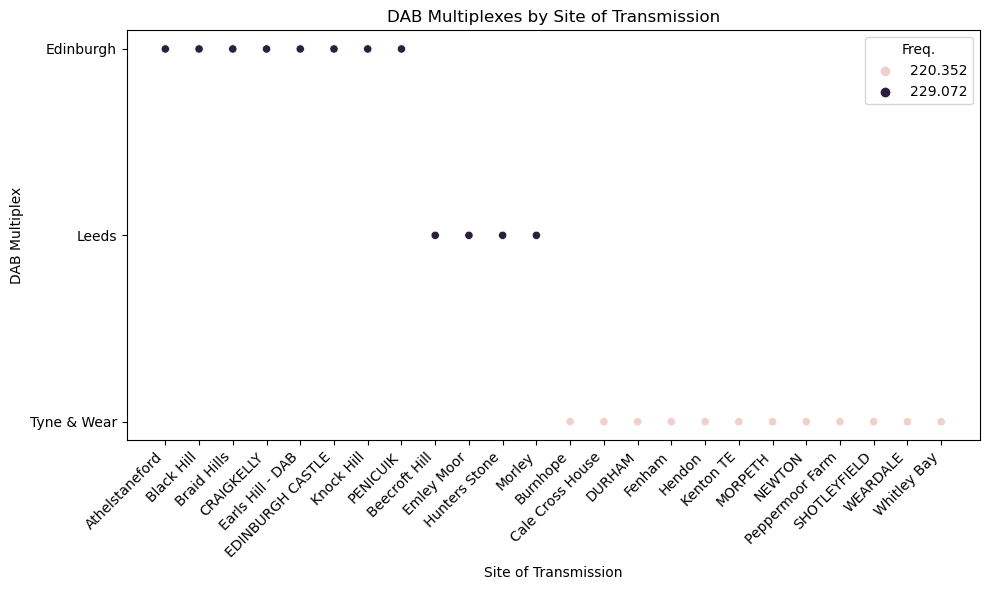

In [176]:

# Assuming 'df' is your DataFrame with the given data
fig, ax = plt.subplots(figsize=(10, 6))

# Using Seaborn to create a scatter plot with color-coded markers
sns.scatterplot(data=graph_data_df, x='Site', y='Ensemble', hue='Freq.', ax=ax)

# Set labels and title
ax.set_xlabel('Site of Transmission')
ax.set_ylabel('DAB Multiplex')
ax.set_title('DAB Multiplexes by Site of Transmission')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



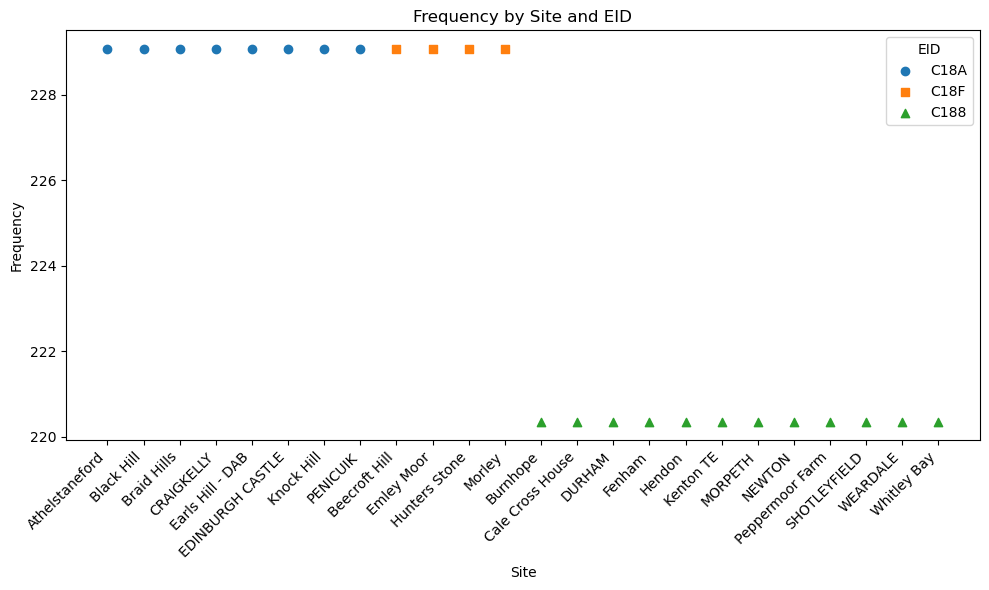

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the given data

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Iterate through unique EIDs to assign different colors and markers
unique_eids = graph_data_df['EID'].unique()
for eid, marker in zip(unique_eids, ['o', 's', '^']):
    subset = graph_data_df[graph_data_df['EID'] == eid]
    plt.scatter(subset['Site'], subset['Freq.'], label=eid, marker=marker)

# Customize the plot
plt.xlabel('Site')
plt.ylabel('Frequency')
plt.title('Frequency by Site and EID')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EID')

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
radio_data_selected[['EID', 'NGR', 'Site', 'Site Height', 'Aerial Height(m)', 'Power(kW)']]

In [ ]:
radio_data_selected['Power(kW)']

In [ ]:
radio_data_selected['Date'].dt.year


In [ ]:
radio_data_selected.loc[radio_data_selected['Date'].dt.year.gt(entered_date)]

In [ ]:
power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.gt(entered_date),'Power(kW)']

In [ ]:
option_height = 'great' #'less' #'equal'

In [ ]:
entered_height = float('75')

In [ ]:
option_date = 'until'  #'from' #'in' 

In [ ]:
entered_date = int('2001')

In [120]:
#i.	For ‘Site Height’ more than 75
def get_power_by_parameter(option_gt, option_ls, option_eq, chosen_option, df_to_compare, entered_data):
    #radio_data_selected = select_DABs()
    df_selected = radio_data_selected
    if chosen_option == option_gt:
        power_by_parameter = df_selected.loc[df_to_compare.gt(entered_data),'Power(kW)']
    elif chosen_option == option_ls:
        power_by_parameter = df_selected.loc[df_to_compare.lt(entered_data),'Power(kW)']
    elif chosen_option == option_eq:
        power_by_parameter = df_selected.loc[df_to_compare.eq(entered_data),'Power(kW)']
    else:
        power_by_parameter = 0
        print('Not an option')

    return power_by_parameter



In [ ]:
#option_gt ='great'
#option_ls = 'less'
#option_eq = 'equal'
#chosen_option = 
#df = radio_data_selected
#df_to_compare = radio_data_selected['Site Height']
#entered_data = entered_height
#power_by_parameter = power_by_height_size
#df_selected = radio_data_selected
option_height = 'great' #'less' #'equal'
try:
    entered_height = float(input())
except ValueError:
    print('Entered value not a valid height')

power_by_par = get_power_by_parameter('great', 'less', 'equal', option_height, radio_data_selected['Site Height'], entered_height)

In [121]:
#option_gt ='from'
#option_ls = 'until'
#option_eq = 'in'
#chosen_option = 
#df = radio_data_selected
#df_to_compare = radio_data_selected['Date'].dt.year
#entered_data = entered_date
#power_by_parameter = power_by_date
#df_selected = radio_data_selected
option_date = 'from'  #'until' #'in'
try:
    entered_date = int(input())
except ValueError:
    print('Entered value not a valid year')

power_by_par = get_power_by_parameter('from', 'until', 'in', option_date, radio_data_selected['Date'].dt.year,  entered_date)

In [124]:
radio_data_selected['Date']

745402   2008-09-11
745418   2017-01-18
745451   2014-10-22
745498   2009-12-03
745539   2004-05-26
745600   2016-09-01
745623   2016-02-15
745651   2008-09-05
745662   2009-12-01
745676   2016-05-26
745713   2015-02-26
745718   2014-10-30
745764   2014-06-26
745902   1999-05-20
745915   2015-12-11
745964   2002-05-28
Name: Date, dtype: datetime64[ns]

In [122]:

print(power_by_par)

mean_power = power_by_par.mean(skipna=True)
mode_power = power_by_par.mode(dropna=True)
median_power = power_by_par.median(skipna=True)

modes=[]
for mode in mode_power:
    modes.append(mode)

print(f"Mean {mean_power:.2f}\nMode {modes}\nMedian {median_power:.2f}")

745402     488.619
745418     600.000
745451     500.000
745498    1000.000
745539    1995.262
745600      92.000
745623     600.000
745651    1000.000
745662     230.000
745676    1000.000
745713     600.000
745718    1000.000
745764    2399.999
745915      89.125
745964    6999.999
Name: Power(kW), dtype: float64
Mean 1239.67
Mode [1000.0]
Median 600.00


In [ ]:
#i.	For ‘Date’ more than 2001

if option_date  == 'from':
    power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.gt(entered_date),'Power(kW)']
elif option_date  == 'until':
    power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.lt(entered_date),'Power(kW)']
elif option_date  == 'in':
    power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.eq(entered_date),'Power(kW)']
else:
    print('Not an option')

print(power_by_date)

mean_power = power_by_date.mean()
mode_power = power_by_date.mode()
median_power = power_by_date.median()

print(f"Mean {mean_power}\n Mode:{mode_power}\n Median: {median_power}")



In [2]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.scrolledtext import ScrolledText
from tkinter.messagebox import showinfo, showerror
from functools import partial
import pandas as pd

In [3]:
#colors
main_colour = '#8991DF'
colour2 = '#377FA5'
colour3 = '#4650B3'
colour4 = '#891A99'

In [4]:
def save_parameter_data_asjson(df):
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    df.to_json(r'C:\Users\herms\Formative_Assignment\saved_parameter.json', orient ='index', date_format = 'iso')

In [5]:
def save_antenna_data_asjson(df):
    df.to_json(r'C:\Users\herms\Formative_Assignment\saved_antenna.json', orient ='index')

In [6]:
def close_all_windows():
    work_window.destroy()

In [7]:
def display_table(frame, df, column_name):
    sliced_df = df.loc[:,:column_name]
    tree = ttk.Treeview(frame, columns=list(sliced_df.columns), show="headings")

    for column in sliced_df.columns:
        tree.heading(column, text=column)
        tree.column(column, width=100)

    tree.grid(row=0, column=0, sticky="nsew")

    for index, row in sliced_df.iterrows():
        tree.insert("", tk.END, values=list(row))

    tree.grid_rowconfigure(0, weight=1)
    tree.grid_columnconfigure(0, weight=1)

In [147]:
global df_parameters
global df_antenna

df_parameters = pd.read_json('saved_parameter.json', convert_dates = ['Date'], keep_default_dates = True, orient ='index')
df_antenna = pd.read_json('saved_antenna.json', convert_dates = ['Date'], keep_default_dates = True, orient ='index')

def drop_NGRs():
    global df_parameters
    global df_antenna
    global NGR_list
    
    indexes_to_drop = df_antenna[df_antenna['NGR'].isin(NGR_list)].index
    df_parameters = df_parameters.drop(indexes_to_drop)
    df_antenna = df_antenna.drop(indexes_to_drop)
    
    print("NGR dropped")
    showinfo(title="Info", message="NGRs dropped")
    print(df_antenna.index)

def add_item_to_list(entry_text, list_print, items_list, df_to_search, col_name):
    list_print.configure(state='normal')
    item_from_text = entry_text.get()
    item_exists = df_to_search[col_name].isin([item_from_text])
    
    if any(item_exists):
        items_list.append(item_from_text)
        list_print = update_print_list(list_print, items_list)
    else:
        showinfo(title="Error", message="Item not present")
    list_print.configure(state='disabled')


def update_print_list(list_to_print, list_to_get):    
    list_to_print.delete('1.0', tk.END)
    for item in list_to_get:
        list_to_print.insert(tk.END, item)
        list_to_print.insert(tk.END, '\n')
    list_to_print.update()
    return list_to_print


def select_DABs():
    DAB_sel = df_parameters[df_parameters['EID'].isin(EID_list)]
    DAB_sel_indexes = DAB_sel.index
    antenna_sel = df_antenna.loc[DAB_sel_indexes]
    #Renaming columns for after extraction
    antenna_sel = antenna_sel.rename(columns={'Long': 'Longitude (Decimal)', 
                   'Lat': 'Latitude (Decimal)',
                   'In-Use Ae Ht': 'Aerial Height(m)',
                   'In-Use ERP Total': 'Power(kW)'})

    radio_data_sel = pd.merge(DAB_sel, antenna_sel, left_index = True, right_index =True)
    radio_data_sel['Date'] = pd.to_datetime(radio_data_sel['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    print(radio_data_sel['Date'])
    radio_data_sel.to_json(r'C:\Users\herms\Formative_Assignment\complete_selected_radio_data.json', orient = 'index') 
    return radio_data_sel
     #I have to see if this function can be used in the principal program withou pressing the button


def show_DABs_in_pop_up():
    DAB_data_window = tk.Toplevel(work_window)
    DAB_data_window.title("DAB data for the selected IDs")
    DAB_data_window.geometry("900x450")

    df_to_show = select_DABs()

    complete_frame = tk.Frame(DAB_data_window)
    complete_frame.pack(fill=tk.BOTH, expand=True)

    display_table(complete_frame, df_to_show, 'NGR')


#Functions for RESULTS
def get_power_by_parameter(options, entered_option, df_to_compare, entered_data, df_selected):
    #radio_data_selected = select_DABs()
    #df_selected = select_DABs()
    chosen_option = entered_option.get()
    if chosen_option == options[0]:
        print(f'option {chosen_option}')
        power_by_parameter = df_selected.loc[df_to_compare.gt(entered_data),'Power(kW)']
    elif chosen_option == options[1]:
        print(f'option {chosen_option}')
        power_by_parameter = df_selected.loc[df_to_compare.lt(entered_data),'Power(kW)']
    elif chosen_option == options[2]:
        print(f'option {chosen_option}')
        power_by_parameter = df_selected.loc[df_to_compare.eq(entered_data),'Power(kW)']
    else:
        power_by_parameter = 0
        showinfo(title = 'Error', message='Not a valid option')

    return power_by_parameter


def fill_statistics_results(power_by_par):
    mean_power = power_by_par.mean(skipna=True)
    median_power = power_by_par.median(skipna=True)
    mode_power_list = power_by_par.mode(dropna=True)

    mean_result.configure(state='normal')
    mean_result.delete(0.0, tk.END)
    mean_result.insert(tk.END, mean_power)
    mean_result.configure(state='disabled')

    median_result.configure(state='normal')
    median_result.delete(0.0, tk.END)
    median_result.insert(tk.END, median_power)
    mean_result.configure(state='disabled')

    try:
        mode_power = mode_power_list[0]
    except KeyError:
        mode_power = []
        pass
    
    mode_result.configure(state='normal')
    mode_result.delete(0.0, tk.END)
    mode_result.insert(tk.END, mode_power)
    mean_result.configure(state='diabled')


def get_results_by_height(options, chosen_height, entered_data): #entered_data = get_height_value
    df_selected = select_DABs()
    try:
        entered_height = float(entered_data.get())
        print(entered_height)
    except ValueError:
        showinfo(title = 'Error', message='Value is not a valid height')
        
    power_by_height = get_power_by_parameter(options, chosen_height, df_selected['Site Height'], entered_height, df_selected)  
    print(power_by_height)
    fill_statistics_results(power_by_height)


def get_results_by_date(options, chosen_date, entered_data):
    df_selected = select_DABs()
    try:
        entered_date = int(entered_data.get())
    except ValueError:
        print('Entered value not a valid year')

    df_selected['Date'] = pd.to_datetime(df_selected['Date'])
    print(df_selected['Date'])

    power_by_date = get_power_by_parameter(options, chosen_date, df_selected['Date'].dt.year,  entered_date, df_selected)
    print(power_by_date)
    fill_statistics_results(power_by_date)


def dummy_function():
    radio_data_sel = select_DABs()
    showinfo(title="Alone Together", 
    message='i dont know where you are going\nbut do you have room for one more\ntroubled soul')



#WORK WINDOW DESIGN

work_window = tk.Tk()
work_window.title("Work Window")
work_window_width = work_window.winfo_screenwidth()
work_window_height = work_window.winfo_screenheight()
work_window.geometry("%dx%d" % (work_window_width, work_window_height))
work_window.resizable(True, True)

# Main Layout
work_window.grid_rowconfigure(0, weight=1)
work_window.grid_columnconfigure(0, weight=6)
work_window.grid_columnconfigure(1, weight=5)

# LEFT FRAME
left_frame = tk.Frame(work_window, bg="white")
left_frame.grid(row=0, column=0, sticky="nsew")

# RIGHT FRAME
right_frame = tk.Frame(work_window, bg=colour2)
right_frame.grid(row=0, column=1, sticky="nsew")

left_frame.grid_columnconfigure(0, weight=1)
right_frame.grid_columnconfigure(0, weight=1)
right_frame.grid_columnconfigure(1, weight=2)
right_frame.grid_columnconfigure(2, weight=1)

for i in range(10):
    left_frame.grid_rowconfigure(i, weight=1)
    right_frame.grid_rowconfigure(i, weight=1)


# WINDOW ELEMENTS
# LEFT ELEMENTS
# Table 1
table1_frame = tk.Frame(left_frame, bg=colour3)
display_table(table1_frame, df_parameters, 'Block')
table1_frame.grid(row=1, column=0)

# Table 2
table2_frame = tk.Frame(left_frame, bg=colour3)
display_table(table2_frame, df_antenna, '0')
table2_frame.grid(row=4, column=0)

save_parameter_file_button = tk.Button(
    left_frame,
    text="Save Parameter File",
    height=2,
    border=1,
    width=15,
    command=partial(save_parameter_data_asjson, df_parameters),
    background = main_colour,
    foreground = 'white'
)
save_parameter_file_button.grid(row=2, column=0)

save_antenna_file_button = tk.Button(
    left_frame,
    text="Save Antenna File",
    height=2,
    border=1,
    width=15,
    command=partial(save_antenna_data_asjson, df_antenna),
    background = main_colour,
    foreground = 'white'
)
save_antenna_file_button.grid(row=5, column=0)

#RIGHT ELEMENTS
first_title_label = tk.Label(right_frame, text = 'DATA MANIPULATION', bg = colour2, fg ='white')
first_title_label.grid(row = 0, column=1)

#Clean_by_NGR_Frame
global NGR_list
NGR_list = ['NZ03586532','NJ94270253','SP820141','NN11277352']
clean_NGR_frame = tk.Frame(right_frame, bg = colour2, highlightthickness=2, highlightbackground='lavender')
clean_NGR_frame.grid(row = 1, column=1, sticky="nsew", padx=5)

#configure internal grid
for i in range(6):
    clean_NGR_frame.grid_rowconfigure(i, weight=1)
clean_NGR_frame.grid_columnconfigure(0, weight=2)
clean_NGR_frame.grid_columnconfigure(1, weight=1)

#Internal Left
cNGR_title_label = tk.Label(clean_NGR_frame, text = 'NGR EXCLUSION', justify ='left', bg = colour2, fg ='white')
cNGR_title_label.grid(row = 0, column=0)

cNGR_inst_label = tk.Label(clean_NGR_frame, text = 'Enter NGR to drop', width=15,  bg = colour2, fg ='white')
cNGR_inst_label.grid(row = 1, column = 0)

cNGR_get_text = tk.Entry(clean_NGR_frame)
cNGR_get_text.grid(row = 2, column = 0)

cNGR_list_print = ScrolledText(clean_NGR_frame, width=15, height=3) # todo check 
cNGR_list_print.grid(row = 2, column = 1, rowspan=2)
cNGR_list_print = update_print_list(cNGR_list_print, NGR_list)
cNGR_list_print.configure(state='disabled')

cNGR_add_button = tk.Button(clean_NGR_frame, text="Add NGR",command=partial(add_item_to_list, cNGR_get_text, cNGR_list_print, NGR_list, df_antenna, 'NGR'))
cNGR_add_button.grid(row = 3, column = 0)

#Internal Right
cNGR_inst_label = tk.Label(clean_NGR_frame, text = 'List of dropped NGRs',  bg = colour2, fg ='white')
cNGR_inst_label.grid(row = 1, column = 1) 

cNGR_drop_button = tk.Button(clean_NGR_frame, text = 'Drop NGRs', command = drop_NGRs, bg = main_colour, fg = 'white')
cNGR_drop_button.grid(row = 4, column = 1)


#Select_EID FRAME
global EID_list
EID_list = ['CE15','C181','C199']
EID_sel_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
EID_sel_frame.grid(row = 2, column = 1, sticky="nsew", padx=5)

#configure internal grid
for i in range(6):
    EID_sel_frame.grid_rowconfigure(i, weight=1)
EID_sel_frame.grid_columnconfigure(0, weight=2, )
EID_sel_frame.grid_columnconfigure(1, weight=1)

#Internal Left
EID_sel_title = tk.Label(EID_sel_frame, text = 'DAB SELECTION by EID', justify ='left', bg = colour2, fg ='white')
EID_sel_title.grid(row = 0, column=0)

EID_sel_text = tk.Label(EID_sel_frame, text = 'Enter EID to select', width=15,  bg = colour2, fg ='white')
EID_sel_text.grid(row = 1, column = 0)

EID_get_text = tk.Entry(EID_sel_frame)
EID_get_text.grid(row = 2, column = 0)

EID_list_print = ScrolledText(EID_sel_frame, width=15, height=3) # todo check 
EID_list_print.grid(row = 2, column = 1, rowspan=2)
EID_list_print = update_print_list(EID_list_print, EID_list)
EID_list_print.configure(state='disabled')

EID_add_button = tk.Button(EID_sel_frame, text="Add EID",command=partial(add_item_to_list, EID_get_text, EID_list_print, EID_list, df_parameters, 'EID'))
EID_add_button.grid(row = 3, column = 0)

#Internal Right
EID_to_get_text = tk.Label(EID_sel_frame, text = 'List of selected EIDs',  bg = colour2, fg ='white')
EID_to_get_text.grid(row = 1, column = 1) 

DAB_sel_button = tk.Button(EID_sel_frame, text = 'SELECT DABs', bg = main_colour, fg = 'white', command = show_DABs_in_pop_up)
DAB_sel_button.grid(row = 4, column = 1)

###---OUTPUTS---##

second_title_label = tk.Label(right_frame, text = 'RESULTS', bg = colour2, fg ='white')
second_title_label.grid(row = 3, column=1)
    
#DESCRIPTIVE STATISTICS (MEAN, MODE, MEDIAN)
ds_stat_frame =  tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
ds_stat_frame.grid(row = 4, column = 1, sticky="nsew", padx=5)

#configure internal grid
for i in range(6):
    ds_stat_frame.grid_rowconfigure(i, weight=1)
for i in range(3):
    ds_stat_frame.grid_columnconfigure(i, weight=2)
ds_stat_frame.grid_columnconfigure(4, weight=1)
ds_stat_frame.grid_columnconfigure(5, weight=1)

ds_stat_title = tk.Label(ds_stat_frame, text = 'In-Use ERP (Power) Statistics', justify ='left', bg = colour2, fg ='white')
ds_stat_title.grid(row = 0, column=0, columnspan=3)
#ds_stat_title = tk.Label(ds_stat_frame, text = 'STATISTICS', justify ='left', bg = colour2, fg ='white')
#ds_stat_title.grid(row = 0, column=1)
#ds_stat_title = tk.Label(ds_stat_frame, text = 'by', justify ='left', bg = colour2, fg ='white')
#ds_stat_title.grid(row = 0, column=2)

#Site Height Options
ds_stat_height_label = tk.Label(ds_stat_frame, text = 'Site Height', justify ='left', bg = colour2, fg ='white')
ds_stat_height_label.grid(row = 1, column=0)

options_height = ['more', 'less', 'equal']
height_comparative = tk.StringVar(ds_stat_frame)
height_comparative.set('more')
height_drop_menu = tk.OptionMenu(ds_stat_frame, height_comparative, *options_height)
height_drop_menu.config(width=3, height = 1)
height_drop_menu.grid(row=1, column =1)

get_height_value = tk.Entry(ds_stat_frame, width = 7)
get_height_value.insert(0, '75')
get_height_value.grid(row = 1, column = 2)

stat_by_height_button = tk.Button(ds_stat_frame, text = 'RESULTS', bg = main_colour, fg = 'white', command = partial(get_results_by_height, options_height, height_comparative, get_height_value))
stat_by_height_button.grid(row = 2, column = 2)

#Date Options
ds_stat_date_label = tk.Label(ds_stat_frame, text = 'Date (Year)', justify ='left', bg = colour2, fg ='white')
ds_stat_date_label.grid(row = 3, column=0)

options_date = ['from', 'until', 'in']
date_comparative = tk.StringVar(ds_stat_frame)
date_comparative.set('from')
date_drop_menu = tk.OptionMenu(ds_stat_frame, date_comparative, *options_date)
date_drop_menu.config(width=3, height = 1)
date_drop_menu.grid(row=3, column =1)

get_year_value = tk.Entry(ds_stat_frame, width = 7)
get_year_value.insert(0, '2001')
get_year_value.grid(row = 3, column = 2)

stat_by_year_button = tk.Button(ds_stat_frame, text = 'RESULTS', bg = main_colour, fg = 'white', command = partial(get_results_by_date, options_date, date_comparative, get_year_value))
stat_by_year_button.grid(row = 4, column = 2)

#Descriptive Statistics Results
#Mean
mean_label = tk.Label(ds_stat_frame, text = 'Mean', justify ='left', bg = colour2, fg ='white')
mean_label.grid(row = 1, column=4)
mean_result= tk.Text(ds_stat_frame, width = 7, height = 1, state='disabled') 
mean_result.grid(row = 1, column = 5)


#Mode
median_label = tk.Label(ds_stat_frame, text = 'Median', justify ='left', bg = colour2, fg ='white')
median_label.grid(row = 2, column=4)
median_result = tk.Text(ds_stat_frame, width = 7, height = 1)  
median_result.grid(row = 2, column = 5)

mode_label = tk.Label(ds_stat_frame, text = 'Mode', justify ='left', bg = colour2, fg ='white')
mode_label.grid(row = 3, column = 4)
mode_result = tk.Text(ds_stat_frame, width = 7, height = 1) # todo check 
mode_result.grid(row = 3, column = 5)


work_window.protocol("WM_DELETE_WINDOW", close_all_windows)

''

In [148]:
work_window.mainloop()

745402    2008-09-11
745418    2017-01-18
745451    2014-10-22
745498    2009-12-03
745539    2004-05-26
745600    2016-09-01
745623    2016-02-15
745651    2008-09-05
745662    2009-12-01
745676    2016-05-26
745713    2015-02-26
745718    2014-10-30
745764    2014-06-26
745902    1999-05-20
745915    2015-12-11
745964    2002-05-28
746303    1900-01-01
Name: Date, dtype: object
75.0
option more
745402     488.619
745418     600.000
745451     500.000
745498    1000.000
745539    1995.262
745600      92.000
745623     600.000
745651    1000.000
745662     230.000
745676    1000.000
745713     600.000
745718    1000.000
745902    2000.000
745915      89.125
745964    6999.999
746303     600.000
Name: Power(kW), dtype: float64


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\herms\anaconda3\envs\apenv\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\herms\AppData\Local\Temp\ipykernel_31928\776088124.py", line 131, in get_results_by_height
    fill_statistics_results(power_by_height)
  File "C:\Users\herms\AppData\Local\Temp\ipykernel_31928\776088124.py", line 118, in fill_statistics_results
    mean_result.configure(state='diabled')
  File "c:\Users\herms\anaconda3\envs\apenv\Lib\tkinter\__init__.py", line 1702, in configure
    return self._configure('configure', cnf, kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\herms\anaconda3\envs\apenv\Lib\tkinter\__init__.py", line 1692, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: bad state "diabled": must be disabled or normal


745402    2008-09-11
745418    2017-01-18
745451    2014-10-22
745498    2009-12-03
745539    2004-05-26
745600    2016-09-01
745623    2016-02-15
745651    2008-09-05
745662    2009-12-01
745676    2016-05-26
745713    2015-02-26
745718    2014-10-30
745764    2014-06-26
745902    1999-05-20
745915    2015-12-11
745964    2002-05-28
746303    1900-01-01
Name: Date, dtype: object
745402   2008-09-11
745418   2017-01-18
745451   2014-10-22
745498   2009-12-03
745539   2004-05-26
745600   2016-09-01
745623   2016-02-15
745651   2008-09-05
745662   2009-12-01
745676   2016-05-26
745713   2015-02-26
745718   2014-10-30
745764   2014-06-26
745902   1999-05-20
745915   2015-12-11
745964   2002-05-28
746303   1900-01-01
Name: Date, dtype: datetime64[ns]
option from
745402     488.619
745418     600.000
745451     500.000
745498    1000.000
745539    1995.262
745600      92.000
745623     600.000
745651    1000.000
745662     230.000
745676    1000.000
745713     600.000
745718    1000.000
745

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\herms\anaconda3\envs\apenv\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\herms\AppData\Local\Temp\ipykernel_31928\776088124.py", line 146, in get_results_by_date
    fill_statistics_results(power_by_date)
  File "C:\Users\herms\AppData\Local\Temp\ipykernel_31928\776088124.py", line 118, in fill_statistics_results
    mean_result.configure(state='diabled')
  File "c:\Users\herms\anaconda3\envs\apenv\Lib\tkinter\__init__.py", line 1702, in configure
    return self._configure('configure', cnf, kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\herms\anaconda3\envs\apenv\Lib\tkinter\__init__.py", line 1692, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: bad state "diabled": must be disabled or normal
